In [333]:
#import required libraries 
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import pandas as pd 

In [334]:
f1 = 'train-images-idx3-ubyte'
f2 = 'train-labels-idx1-ubyte'
f3 = 't10k-images-idx3-ubyte'
f4 = 't10k-labels-idx1-ubyte'

# Convert files into numpy array
Xtrain = idx2numpy.convert_from_file(f1)
Ytrain = idx2numpy.convert_from_file(f2)
Xtest = idx2numpy.convert_from_file(f3)
Ytest = idx2numpy.convert_from_file(f4)

IndicesTrain = Ytrain

In [335]:
Xtrain = Xtrain.reshape(-1,784)                   # flattening the array of pixles 
Xtest = Xtest.reshape(-1,784)
Xtrain = Xtrain / 255.0                           # Normalization
Xtest = Xtest / 255.0

In [400]:
batch_size = 64                               # number of observations in minibatch 
inputdim = 784                                # dimension of the input layer 
hiddendim = 512                               # dimension of the hidden layer
outputdim = 10                                # dimension of the output layer 
alpha = 0.01                                  # learning rate
nb = len(Xtrain)/ batch_size                  # number of minibatches  

In [380]:
Ytrain = pd.get_dummies(Ytrain)               # one hot encoding

In [401]:
W1 = (0.2)*np.random.randn(inputdim, hiddendim)             # Initialization of weight matrices 
W2 = (0.2)*np.random.randn(hiddendim,outputdim)

In [359]:
def relu(a):                                         # Relu activation function   
    return np.maximum(a,0)

def grad_relu(x):                                    # Gradient of Relu
    return 1. * (x > 0)

def softmax(z):                                      # Softmax activation function
    return np.exp(z) / np.sum(np.exp(z),axis=1,keepdims=True)
    

ForwardProp function takes the value of corresponding batch inpur(X_Batch) and weight matrieces (W1 and W2) and returns the value of z and activated output. Here, the relu activation function is used for hidden layer and softmax activation function is used for output layer.
 

In [360]:
def ForwardProp(X_Batch,W1,W2):                      # Forward propagation       
    z1 =np.dot(X_Batch,W1)
    a1 =relu(z1)
    z2 = np.dot(a1,W2)
    a2 = softmax(z2) 
    return z1,a1,z2,a2

In [361]:
def Cost(a2, Indices_Batch):                     # calculates the log loss for given output a2.  
    neglog = -np.log(a2+0.00000001)
    return np.mean(np.diag(np.take(neglog, Indices_Batch, axis=1)))

BackProp function takes the relevant input i.e, X and Y of the minibatch, weight matrices and activated output of hidden and output layer and returns the gradient of weight W2 and W1.  

In [362]:
def BackProp(X_Batch, Y_Batch, a1, a2, W1, W2, z1):
    grad = a2 - Y_Batch
    dW2 = np.dot(np.transpose(a1),grad)
    da1 = np.dot(grad,np.transpose(W2))
    dz1 = da1*grad_relu(z1)
    dW1 = np.dot(X_Batch.T,dz1)
    return dW2,dW1

In [402]:
nl = 20000
Loss = []
I = []
i_epoch = 0

for i in range(nl):
    index = i%nb
    X_Batch = Xtrain[index*batch_size:(index+1)*batch_size]
    Y_Batch = Ytrain[index*batch_size:(index+1)*batch_size]
    Indices_Batch = IndicesTrain[index*batch_size:(index+1)*batch_size]
    
    z1,a1,z2,a2 = ForwardProp(X_Batch, W1,W2)
    
    if i%nb == 0:
        loss = Cost(a2, Indices_Batch)  
        print(" Epoch: {:d}, iteration: {:d}, Loss: {:6.4f} ".format(i_epoch, i, loss))
        I.append(i)
        Loss.append(loss)
        i_epoch += 1
        
        if i_epoch%10 == 0:
            alpha /= 10.0
     
    

    dW2, dW1 = BackProp(X_Batch, Y_Batch, a1, a2, W1, W2, z1)
    W2 -= alpha * dW2
    W1 -= alpha * dW1

    

 Epoch: 0, iteration: 0, Loss: 7.3977 
 Epoch: 1, iteration: 937, Loss: 0.0617 
 Epoch: 2, iteration: 1874, Loss: 0.0290 
 Epoch: 3, iteration: 2811, Loss: 0.0155 
 Epoch: 4, iteration: 3748, Loss: 0.0106 
 Epoch: 5, iteration: 4685, Loss: 0.0101 
 Epoch: 6, iteration: 5622, Loss: 0.0118 
 Epoch: 7, iteration: 6559, Loss: 0.0062 
 Epoch: 8, iteration: 7496, Loss: 0.0055 
 Epoch: 9, iteration: 8433, Loss: 0.0040 
 Epoch: 10, iteration: 9370, Loss: 0.0025 
 Epoch: 11, iteration: 10307, Loss: 0.0025 
 Epoch: 12, iteration: 11244, Loss: 0.0025 
 Epoch: 13, iteration: 12181, Loss: 0.0024 
 Epoch: 14, iteration: 13118, Loss: 0.0023 
 Epoch: 15, iteration: 14055, Loss: 0.0023 
 Epoch: 16, iteration: 14992, Loss: 0.0022 
 Epoch: 17, iteration: 15929, Loss: 0.0021 
 Epoch: 18, iteration: 16866, Loss: 0.0020 
 Epoch: 19, iteration: 17803, Loss: 0.0020 
 Epoch: 20, iteration: 18740, Loss: 0.0020 
 Epoch: 21, iteration: 19677, Loss: 0.0019 


As the loss decreases sharply for initial iterations, the axis for loss is taken as semilog axis

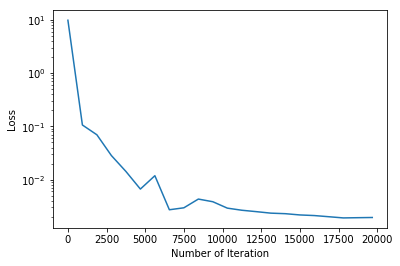

In [383]:
# alpha = 0.001, dimension of hidden layer = 512, Batch size = 64, Number of iteration = 20000
plt.semilogy()
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.plot(I,Loss)

# Loss fluctuates around 0.027

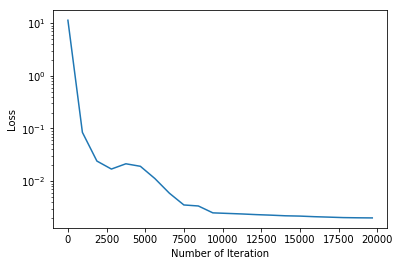

In [375]:
# alpha = 0.01, dimension of hidden layer = 512, Batch size = 64, Number of iteration = 20000
plt.semilogy()
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.plot(I,Loss)

# Loss fluctuate around 0.0015

For alpha = 0.001 the loss got constant at 0.0273, but for alpha = 0.01 it got saturated at 0.0015. So, for lower learning rate model might get stuck in some local minima. 

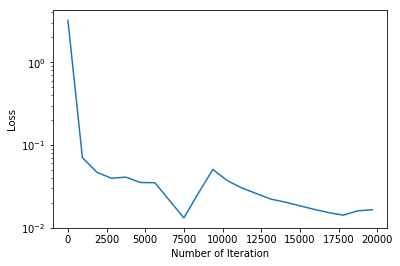

In [387]:
# alpha = 0.01, dimension of hidden layer = 64, Batch size = 64, Number of iteration = 20000
plt.semilogy()
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.plot(I,Loss)

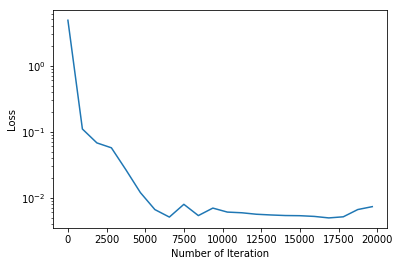

In [391]:
# alpha = 0.01, dimension of hidden layer = 128, Batch size = 64, Number of iteration = 20000
plt.semilogy()
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.plot(I,Loss)

# It fluctuates around 0.006

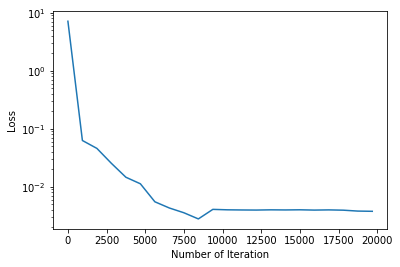

In [395]:
# alpha = 0.01, dimension of hidden layer = 256, Batch size = 64, Number of iteration = 20000
plt.semilogy()
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.plot(I,Loss)

# It fluctuates around 0.004

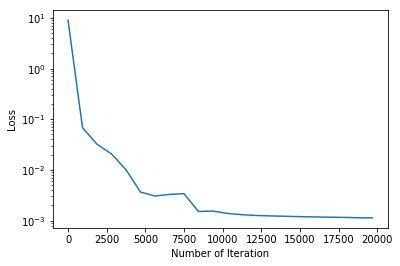

In [399]:
# alpha = 0.01, dimension of hidden layer = 1024, Batch size = 64, Number of iteration = 20000
plt.semilogy()
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.plot(I,Loss)

# It fluctuates around 0.0012

Training the model with hidden layer dimension of 1024 is computationally much more expensive, but the change in loss is not that much significant. So here dimenstion of hidden layer is kept 512.  

In [355]:
batch_size_test = 100 
nb = len(Ytest)/batch_size_test
correct = 0


for i in range(int(nb)):
    index = i%nb
    X_Batch = Xtest[i*batch_size_test:(i+1)*batch_size_test]
    Y_Batch = Ytest[i*batch_size_test:(i+1)*batch_size_test]

    z1,a1,z2,a2 = ForwardProp(X_Batch, W1,W2)
    
    Y_Pred = np.argmax(a2, axis=1)
    correct +=  np.sum(Y_Pred == Y_Batch)
    accuracy = float(correct)/float(len(Ytest)) 
    
print ("Test accuracy is {:4.4f} %".format(accuracy*100))

Test accuracy is 97.9400 %
